<a href="https://colab.research.google.com/github/ps-dev12/python4beginners-Hacktoberfest21/blob/main/Python%20Codes/Advance%20Python/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from tensorflow.keras import layers,models

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In a grayscale image the intensity value varies from 0 to 255.

But we normalize it between 0 and 1 because it helps the network in learning faster during gradient descent .

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train.shape

(60000, 28, 28)

Here we reshape the dataset so that we can use it with tf model

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

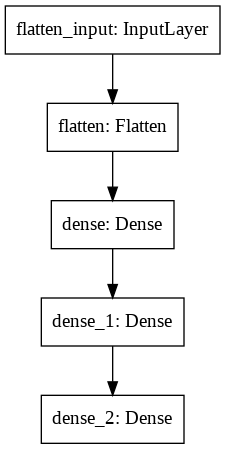

In [11]:
tf.keras.utils.plot_model(model)

In [12]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6064 - accuracy: 0.8454
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2911 - accuracy: 0.9178
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2343 - accuracy: 0.9324
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2003 - accuracy: 0.9422
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1760 - accuracy: 0.9492
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1570 - accuracy: 0.9544
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9589
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1293 - accuracy: 0.9631
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1187 - accuracy: 0.9662
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.109

In [13]:
test_loss, test_acc = model.evaluate(X_test,y_test)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0797 - accuracy: 0.9746

Test accuracy: 0.9746000170707703


In [14]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(X_test)

In [16]:
predictions[0]

array([3.8689109e-06, 2.2837005e-06, 2.4521592e-04, 4.9003423e-04,
       5.8964116e-07, 1.3725358e-06, 2.6332712e-09, 9.9919182e-01,
       3.2614422e-05, 3.2178461e-05], dtype=float32)

A prediction is an array of 10 numbers. 

They represent the model's "confidence" that the image corresponds to each of the 10 different digits of number. 

You can see which label has the highest confidence value:

**Actual label**

In [17]:
y_test[0]

7

**Predicted Value**

In [18]:
np.argmax(predictions[0])

7

In [19]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [20]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

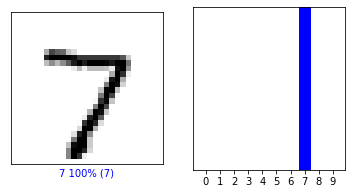

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

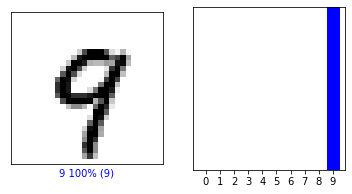

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],  y_test, X_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

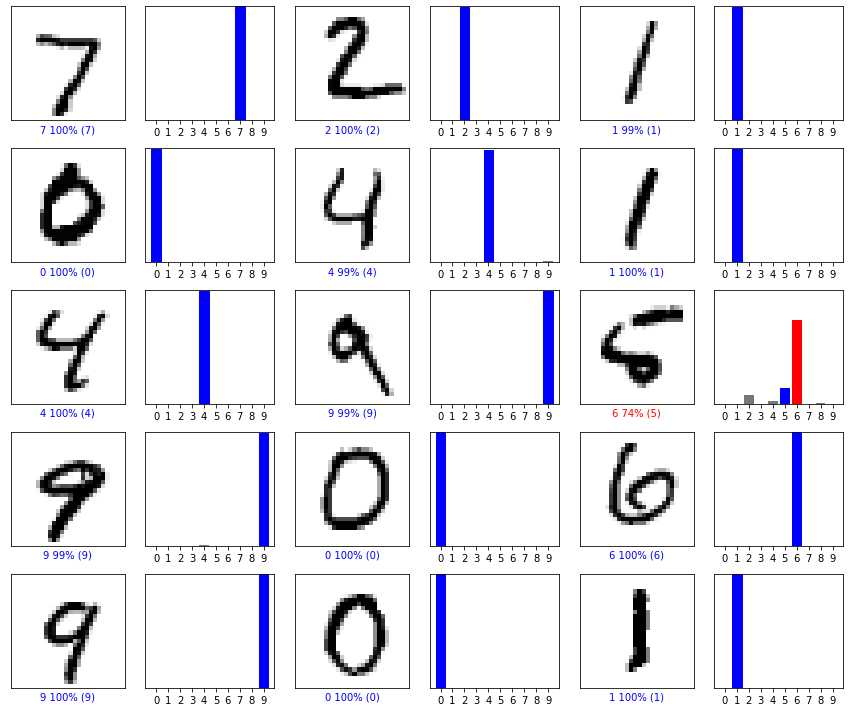

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test.reshape(-1,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()